In [2]:
import pydeck as pdk
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv('./phantom_grouped.csv')

In [6]:
len(data)

314219

In [8]:
data.head()

,count,end_lat,end_lon,next_lat,next_lon
0,15678,40.726218,-73.983799,40.729387,-73.977724
1,12721,40.756405,-73.990026,40.755136,-73.986580
2,8305,40.729387,-73.977724,40.726218,-73.983799
3,8231,40.726218,-73.983799,40.733143,-73.975739
4,6378,40.729236,-73.990868,40.726218,-73.983799


In [21]:
sorted_data = data.sort_values(by='count',ascending = False)

In [58]:
GREEN_RGB = [0, 255, 0, 80]
RED_RGB = [240, 100, 0, 80]
arc_layer = pdk.Layer(
    "ArcLayer",
    data = sorted_data[:1000],
    get_source_position=['end_lon','end_lat'],
    get_target_position = ['next_lon','next_lat'],
    get_tilt=15,
    get_source_color=RED_RGB,
    get_target_color=GREEN_RGB,
    pickable=True,
    auto_highlight=True,
    get_width = 'count/700')

view_state = pdk.ViewState(latitude = 40.778786,longitude = -73.974785, bearing=45, pitch=50, zoom=11,)
# latitude = 40.778786,longitude = -73.974785

TOOLTIP_TEXT = {"html": "{count} bikes <br /> Home of commuter in red; work location in green"}
r = pdk.Deck(arc_layer, initial_view_state=view_state, tooltip=TOOLTIP_TEXT,map_style = 'light')
r.to_html("arc_layer.html")

In [33]:
deck = pdk.Deck(layers = arc_layer,map_style='carto_positron')
deck.show()

DeckGLWidget(carto_key=None, custom_libraries=[], google_maps_key=None, json_input='{"initialViewState": {"lat…

# Exploring Phantom Rides

In [145]:
phantom = pd.read_csv('../../../capstone_other/files_too_large_for_github/phantom2.csv')

In [4]:
phantom.head(2)

,bike_id,end_station_id,end_station_name,end_lat,end_lon,end_time,next_station_id,next_station_name,next_lat,next_lon,next_time,end_borough,next_borough,end_day,next_day
0,16344,507,E 25 St & 2 Ave,40.739126,-73.979738,2013-06-09 20:40:52,164,E 47 St & 2 Ave,40.753231,-73.970325,2013-06-10 09:49:57,Manhattan,Manhattan,1,2
1,16344,510,W 51 St & 6 Ave,40.760660,-73.980420,2013-06-12 07:53:02,484,W 44 St & 5 Ave,40.755003,-73.980144,2013-06-13 17:29:33,Manhattan,Manhattan,4,5


# Weekday Rebalancing Rides


In [5]:
weekday_phantom = phantom[phantom['end_day'].isin([2,3,4,5,6])]

In [6]:
weekday_grouped = weekday_phantom.groupby(['end_station_id','next_station_id'])\
    .agg(count=('bike_id',np.size),
        end_station = ('end_station_name',np.min),
        end_lat = ('end_lat', np.min),
        end_lon = ('end_lon', np.min),
        next_station = ('next_station_name', np.min),
        next_lat = ('next_lat',np.min),
        next_lon = ('next_lon', np.min),
        ).reset_index()

In [7]:
weekday_grouped.sort_values(by = 'count',ascending = False, inplace = True)

In [8]:
BLUE_RGB = [0, 59, 112, 90]
RED_RGB = [217, 38, 28, 90]
arc_layer = pdk.Layer(
    "ArcLayer",
    data = weekday_grouped[:300],
    get_source_position=['end_lon','end_lat'],
    get_target_position = ['next_lon','next_lat'],
    get_tilt=15,
    get_source_color=RED_RGB,
    get_target_color=BLUE_RGB,
    pickable=True,
    auto_highlight=True,
    get_width = 'count/700')

view_state = pdk.ViewState(latitude = 40.778786,longitude = -73.974785, bearing=45, pitch=50, zoom=11,)
# latitude = 40.778786,longitude = -73.974785

TOOLTIP_TEXT = {"html": "{count} bikes moved from {end_station}<br />\
                to {next_station}Home of commuter in red; work location in green"}
r = pdk.Deck(arc_layer, initial_view_state=view_state, tooltip=TOOLTIP_TEXT,map_style = 'light')
r.to_html("weekday_rebalancing.html")

# Weekend Rebalancing Rides

In [9]:
weekend_phantom = phantom[phantom['end_day'].isin([1,7])]

In [10]:
weekend_grouped = weekend_phantom.groupby(['end_station_id','next_station_id'])\
    .agg(count=('bike_id',np.size),
        end_station = ('end_station_name',np.min),
        end_lat = ('end_lat', np.min),
        end_lon = ('end_lon', np.min),
        next_station = ('next_station_name', np.min),
        next_lat = ('next_lat',np.min),
        next_lon = ('next_lon', np.min),
        ).reset_index()

In [11]:
weekend_grouped.sort_values(by = 'count',ascending = False, inplace = True)

In [12]:
BLUE_RGB = [0, 59, 112, 90]
RED_RGB = [217, 38, 28, 90]
arc_layer = pdk.Layer(
    "ArcLayer",
    data = weekend_grouped[:300],
    get_source_position=['end_lon','end_lat'],
    get_target_position = ['next_lon','next_lat'],
    get_tilt=15,
    get_source_color=RED_RGB,
    get_target_color=BLUE_RGB,
    pickable=True,
    auto_highlight=True,
    get_width = 'count/200')

view_state = pdk.ViewState(latitude = 40.778786,longitude = -73.974785, bearing=45, pitch=50, zoom=11,)
# latitude = 40.778786,longitude = -73.974785

TOOLTIP_TEXT = {"html": "{count} bikes moved from {end_station}<br />\
                to {next_station}Home of commuter in red; work location in green"}
r = pdk.Deck(arc_layer, initial_view_state=view_state, tooltip=TOOLTIP_TEXT,map_style = 'light')
r.to_html("weekend_rebalancing.html")

# Lets get a bit more refined
We will start by lookig at the rebalancing that happens in the AM of the weedays

In [ ]:
weekend_phantom = phantom[phantom['end_day'].isin([1,7])]

In [69]:
import datetime as dt
import seaborn as sns
from matplotlib import pyplot as plt

In [60]:
phantom.head(2)

,bike_id,end_station_id,end_station_name,end_lat,end_lon,end_time,next_station_id,next_station_name,next_lat,next_lon,next_time,end_borough,next_borough,end_day,next_day
0,16344,507,E 25 St & 2 Ave,40.739126,-73.979738,2013-06-09 20:40:52,164,E 47 St & 2 Ave,40.753231,-73.970325,2013-06-10 09:49:57,Manhattan,Manhattan,1,2
1,16344,510,W 51 St & 6 Ave,40.760660,-73.980420,2013-06-12 07:53:02,484,W 44 St & 5 Ave,40.755003,-73.980144,2013-06-13 17:29:33,Manhattan,Manhattan,4,5


In [146]:
phantom['end_time'] = phantom['end_time'].apply(lambda x: dt.datetime.fromisoformat(x))
phantom['next_time'] = phantom['next_time'].apply(lambda x: dt.datetime.fromisoformat(x))

In [147]:
phantom['time_diff'] = phantom.apply(lambda x: (x['next_time'] - x['end_time']).total_seconds()/3600, axis = 1)

In [148]:
len(phantom)

4690323

In [149]:
phantom_positive = phantom[phantom['time_diff'] >= 0]

In [150]:
len(phantom_positive)

4679775

In [151]:
len(phantom_positive[phantom_positive['time_diff'] <= 12])

2304746

In [158]:
less_than_12 = phantom_positive[phantom_positive['time_diff'] <= 12]

(array([583969., 433090., 290006., 204567., 150456., 122925., 125305.,
        133353., 129305., 131770.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <BarContainer object of 10 artists>)

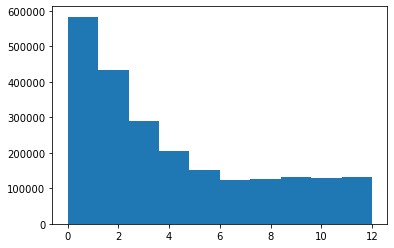

In [159]:
plt.hist(less_than_12['time_diff'])

<AxesSubplot:xlabel='time_diff', ylabel='Density'>

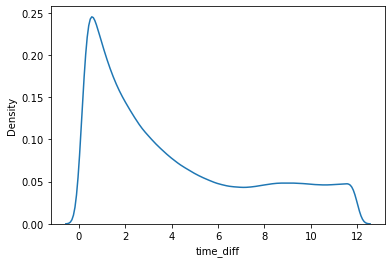

In [160]:
sns.kdeplot(less_than_12['time_diff'])

In [163]:
less_than_12['time'] = less_than_12.apply(lambda x: ((x['next_time'] - x['end_time']) / 2 + x['end_time']).hour, axis = 1)

<ipython-input-163-db0a6e0667ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  less_than_12['time'] = less_than_12.apply(lambda x: ((x['next_time'] - x['end_time']) / 2 + x['end_time']).hour, axis = 1)


In [164]:
less_than_12

,bike_id,end_station_id,end_station_name,end_lat,end_lon,end_time,next_station_id,next_station_name,next_lat,next_lon,next_time,end_borough,next_borough,end_day,next_day,time_diff,time
2,16344,487,E 20 St & FDR Drive,40.733143,-73.975739,2013-06-15 14:42:09.000,356,Bialystoker Pl & Delancey St,40.716226,-73.982612,2013-06-15 17:42:42.000,Manhattan,Manhattan,7,7,3.009167,16
5,16344,268,Howard St & Centre St,40.719105,-73.999733,2013-06-29 21:23:02.000,355,Bayard St & Baxter St,40.716021,-73.999744,2013-06-29 22:49:14.000,Manhattan,Manhattan,7,7,1.436667,22
6,16344,435,W 21 St & 6 Ave,40.741740,-73.994156,2013-06-30 14:02:15.000,238,Bank St & Washington St,40.736197,-74.008592,2013-06-30 14:30:54.000,Manhattan,Manhattan,1,1,0.477500,14
7,16344,394,E 9 St & Avenue C,40.725213,-73.977688,2013-07-01 09:21:44.000,318,E 43 St & Vanderbilt Ave,40.753202,-73.977987,2013-07-01 17:08:59.000,Manhattan,Manhattan,2,2,7.787500,13
8,16344,479,9 Ave & W 45 St,40.760193,-73.991255,2013-07-01 17:14:25.000,518,E 39 St & 2 Ave,40.747804,-73.973442,2013-07-01 17:41:29.000,Manhattan,Manhattan,2,2,0.451111,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690311,49758,517,Pershing Square South,40.751581,-73.977910,2020-12-11 11:11:26.276,380,W 4 St & 7 Ave S,40.734011,-74.002939,2020-12-11 14:07:33.996,Manhattan,Manhattan,6,6,2.935478,12
4690312,49758,3167,Amsterdam Ave & W 73 St,40.779668,-73.980930,2020-12-14 19:07:26.611,3350,W 100 St & Broadway,40.797372,-73.970412,2020-12-14 22:52:25.516,Manhattan,Manhattan,2,2,3.749696,20
4690315,49784,3735,W 30 St & 10 Ave,40.752694,-74.002353,2021-01-05 04:36:49.542,4067,Amsterdam Ave & W 180 St,40.847396,-73.931205,2021-01-05 13:27:59.801,Manhattan,Manhattan,3,3,8.852850,9
4690317,49784,453,W 22 St & 8 Ave,40.744751,-73.999154,2021-01-17 10:33:43.819,380,W 4 St & 7 Ave S,40.734011,-74.002939,2021-01-17 12:58:57.307,Manhattan,Manhattan,1,1,2.420413,11


## Distribution of times of phantom rides (interpolated between end time and next time)

(array([ 25623.,  45014.,  73824.,  59915.,  31509.,  16995.,  15263.,
         44368., 103282., 130030., 145946., 157092., 180375., 200414.,
        154633., 137738., 151055., 168848., 158171., 119723.,  87558.,
         52803.,  28162.,  16405.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <BarContainer object of 24 artists>)

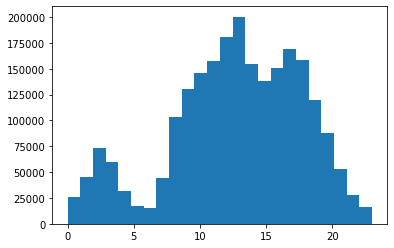

In [169]:
plt.hist(less_than_12[less_than_12['time_diff'] <= 12]['time'], bins = 24)

(array([  2372.,   1086.,    405.,    194.,    157.,    498.,   4337.,
         27115.,  71217.,  73860.,  48616.,  40616.,  44119.,  49188.,
         49819.,  54058.,  75948., 107592., 103861.,  64397.,  35897.,
         20588.,  10984.,   5591.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <BarContainer object of 24 artists>)

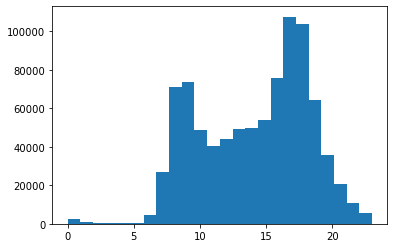

In [171]:
plt.hist(less_than_12[less_than_12['time_diff'] <= 2]['time'], bins = 24)